## Project: Price Discount Impact Analysis
Objective
To evaluate how price discounts affect the sales volume of luggage products, providing insights into the effectiveness of discounts on sales.

## Data Description
- Dataset: E-commerce product listings.
- Features include:
- asin: Unique product identifier.
- title: Product title.
- imgUrl: Image URL.
- productURL: Product URL.
- stars: Customer ratings.
- reviews: Number of reviews.
- price: Current selling price.
- listPrice: Original list price.
- category_id: Category identifier.
- isBestSeller: Bestseller status.
- boughtInLastMonth: Number of units bought in the last month.

## Import Libraries

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 75

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Defining Functions

## Load Dataset

In [2]:
data = pd.read_csv("../data/amazon_products.csv")

## Peek at the Data

In [3]:
data

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400
...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0


## Data Preprocessing

- Feature Engineering: Calculate discount percent, categorize discounts into ranges.

In [4]:
# Make a copy of the dataset before preprocessing to maintain original
df = data.copy()

## Data Cleaning
- Handle missing values
- Remove duplicates
- Correct data types

In [5]:
# Checking for missing values
df.isnull().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

- There are no missing values in the dataset, other than one title, so let's handle that one case

In [6]:
# Fill missing values in 'title' with a placeholder
df['title'].fillna('Unknown', inplace=True)

In [7]:
# Checking for dupes
df.duplicated().sum()

0

- No duplicate records exist in the dataset

In [8]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426337 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


## Feature Engineering

In [9]:
# Update listPrice where it's less than price
df.loc[df['listPrice'] < df['price'], 'listPrice'] = df['price']

In [10]:
# Calculating the discount percent
df['discount_percent'] = ((df['listPrice'] - df['price']) / df['listPrice']) * 100
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,discount_percent
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,139.99,104,False,2000,0.000000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,19.048526
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,15.000349
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,17.715947
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,43.549792


In [11]:
# No discount percent should be less than zero
df.discount_percent.min()

0.0

In [48]:
# Check for NaN values in each column
columns_with_nan = df.columns[df.isna().any()].tolist()

print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [13]:
# Looking at records where discount percent is NaN
df[df.discount_percent.isna()]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,discount_percent
177,B0BH6N9WMT,Airconic Hardside Expandable Luggage with Spin...,https://m.media-amazon.com/images/I/81lQQrl0By...,https://www.amazon.com/dp/B0BH6N9WMT,3.8,0,0.0,0.0,104,False,0,NaN
180,B0BH9DL82Y,4 KIX 2.0 Softside Expandable Luggage with Spi...,https://m.media-amazon.com/images/I/91quX26fgZ...,https://www.amazon.com/dp/B0BH9DL82Y,4.5,0,0.0,0.0,104,False,0,NaN
252,B0CFL93Y9M,OCEAN HOLIDAY Luggage with Double Spinner Whee...,https://m.media-amazon.com/images/I/61bvKvJaQU...,https://www.amazon.com/dp/B0CFL93Y9M,0.0,0,0.0,0.0,104,False,0,NaN
328,B081TNY17M,Merge Short Trip Expandable Packing Case Mediu...,https://m.media-amazon.com/images/I/81UsxCRqUs...,https://www.amazon.com/dp/B081TNY17M,3.9,0,0.0,0.0,104,False,0,NaN
445,B0BTYZR67H,"Suitcase Caster, 1 Pair Luggage Swivel Wheels ...",https://m.media-amazon.com/images/I/61Al5DVttX...,https://www.amazon.com/dp/B0BTYZR67H,4.0,0,0.0,0.0,104,False,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1425506,B07RFNKC4P,Unisex-Kid's Air Max Oketo Grade School Sneake...,https://m.media-amazon.com/images/I/61U66PYiKC...,https://www.amazon.com/dp/B07RFNKC4P,2.9,0,0.0,0.0,90,False,0,NaN
1425512,B08FXR9N92,Jordan Jordan Flare (Little Kid) Black/White 1...,https://m.media-amazon.com/images/I/51YOWlZJt7...,https://www.amazon.com/dp/B08FXR9N92,4.4,0,0.0,0.0,90,False,0,NaN
1426191,B00JY7KWG2,Men's Hunt Fleece Camo Glove,https://m.media-amazon.com/images/I/81ghxP54O9...,https://www.amazon.com/dp/B00JY7KWG2,4.4,0,0.0,0.0,112,False,0,NaN
1426263,B01AK21664,Dri-Fit Swoosh Headband 2.0,https://m.media-amazon.com/images/I/51vKkmlCMI...,https://www.amazon.com/dp/B01AK21664,4.2,0,0.0,0.0,112,False,0,NaN


- These are cases where price and listPrice are both equal to zero, so let's update discount_percent to zero

In [14]:
# Update discount_percent to 0 where both price and listPrice are 0
df.loc[(df['price'] == 0) & (df['listPrice'] == 0), 'discount_percent'] = 0

# And validating no records are NaN after update
df[df.discount_percent.isna()]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,discount_percent


- Confirmed, no records with NaN

## Exploratory Data Analysis (EDA)

In [15]:
# Filter rows where discount_percent is not 0 and not 100
filtered_discount_percent = df[(df['discount_percent'] != 0) & (df['discount_percent'] != 100)]

In [17]:
discount_percent_filtered = df['discount_percent'][(df['discount_percent'] > 0) & (df['discount_percent'] <= 100)]

C:\Users\chris\AppData\Local\Temp\ipykernel_7872\3258435813.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(discount_percent_filtered.dropna())
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\chris\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.u

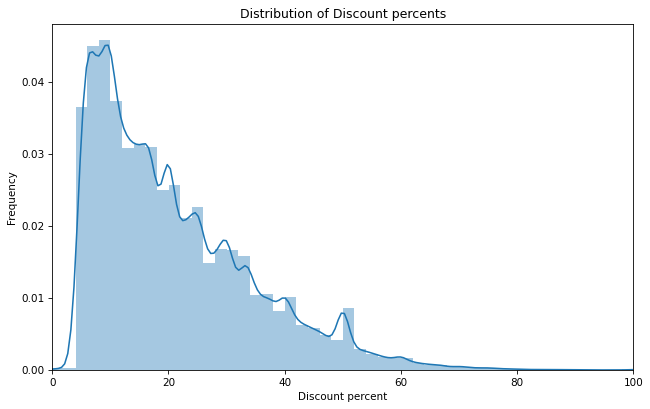

In [21]:
# Distribution of discounts
plt.figure(figsize=(10, 6))
sns.distplot(discount_percent_filtered.dropna())
plt.title('Distribution of Discount percents')
plt.xlabel('Discount percent')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.show()

- The distribution is right-skewed. The majority of discounts are under 20%, with most frequent near 10%.

## Model Building

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426337 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
 11  discount_percent   1426337 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 121.1+ MB


In [40]:
# Convert isBestSeller to numeric
df['isBestSeller'] = df['isBestSeller'].astype(int)

In [56]:
# Transform 'title' using TF-IDF
tfidf = TfidfVectorizer(max_features=100)  # You can adjust the number of features
title_features = tfidf.fit_transform(df['title']).toarray()
title_features_df = pd.DataFrame(title_features, columns=tfidf.get_feature_names_out())

### Term Frequency-Inverse Document Frequency
In practice, TF-IDF is used as a weighting factor in searches of information retrieval, text mining, and user modeling. The TF-IDF weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus.

This makes TF-IDF very useful in scenarios like:

- Document Search: Ranking the relevance of documents to a particular query in search engines.
- Document Clustering and Classification: Grouping documents into categories and tagging them.
- Feature Selection: Selecting specific terms that are most descriptive of a given set of documents.

It's a foundational technique in the field of text analytics and is often used in the preprocessing steps for machine learning models involving text data.

In [57]:
title_features_df

,10,100,12,15,16,accessories,adjustable,air,and,art,...,travel,up,usb,wall,watch,water,waterproof,white,with,women
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.322967,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.417338
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.546771,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.303661,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1426333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.762357,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1426334,0.0,0.0,0.0,0.0,0.0,0.0,0.414080,0.0,0.240508,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.212674,0.000000
1426335,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [60]:
# Combine title features with original data
data_combined = pd.concat([df, title_features_df], axis=1)

In [61]:
data_combined

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,...,travel,up,usb,wall,watch,water,waterproof,white,with,women
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,139.99,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.417338
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.546771,0.000000
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.303661,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,14.95,112,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,33.99,112,0,...,0.0,0.762357,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,8.54,112,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.212674,0.000000
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [63]:
# Selecting features for the model
X = data_combined.drop(['boughtInLastMonth', 'asin', 'title', 'imgUrl', 'productURL'], axis=1)
y = data_combined['boughtInLastMonth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predicting on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 686371.5387714555
R-squared: 0.07690760330068036


In [65]:
## Continuation for next time 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and preprocess your data
# ...

# Scaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Scaling the target variable if necessary
# y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
model.evaluate(X_test, y_test)



ModuleNotFoundError: No module named 'tensorflow'